In [4]:
import pandas as pd

urls = [
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
]

# Read each CSV into a DataFrame and store in a list
dataframes = [pd.read_csv(url) for url in urls]

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
display(df.head())




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [9]:
from google.colab import files

files.download("tiendas_combinadas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

# URLs de las 4 tiendas
urls = [
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
]

# Cargar y unir
dataframes = []
for i, url in enumerate(urls, start=1):
    df_temp = pd.read_csv(url)
    df_temp["Tienda"] = f"Tienda_{i}"  # Identificador de tienda
    dataframes.append(df_temp)

df = pd.concat(dataframes, ignore_index=True)

# --- 1. Ventas totales por tienda ---
ventas_totales = df.groupby("Tienda")["Precio"].sum().reset_index(name="Ventas Totales")

# --- 2. Categoría más y menos vendida por tienda ---
ventas_categoria = df.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().reset_index()
cat_max = ventas_categoria.loc[ventas_categoria.groupby("Tienda")["Precio"].idxmax()][["Tienda", "Categoría del Producto", "Precio"]]
cat_min = ventas_categoria.loc[ventas_categoria.groupby("Tienda")["Precio"].idxmin()][["Tienda", "Categoría del Producto", "Precio"]]
cat_max.rename(columns={"Categoría del Producto": "Categoria Más Vendida", "Precio": "Ventas Categoria Máx"}, inplace=True)
cat_min.rename(columns={"Categoría del Producto": "Categoria Menos Vendida", "Precio": "Ventas Categoria Mín"}, inplace=True)

# --- 3. Calificación promedio ---
calificacion_prom = df.groupby("Tienda")["Calificación"].mean().reset_index(name="Calificación Promedio")

# --- 4. Producto más vendido y en qué tienda ---
ventas_producto = df.groupby(["Tienda", "Producto"])["Precio"].sum().reset_index()
prod_max = ventas_producto.loc[ventas_producto.groupby("Tienda")["Precio"].idxmax()][["Tienda", "Producto", "Precio"]]
prod_max.rename(columns={"Producto": "Producto Más Vendido", "Precio": "Ventas Producto Máx"}, inplace=True)

# --- 5. Costo de envío total por tienda ---
costo_envio = df.groupby("Tienda")["Costo de envío"].sum().reset_index(name="Costo Envío Total")

# --- Unir todo ---
comparativo = ventas_totales.merge(cat_max, on="Tienda")
comparativo = comparativo.merge(cat_min, on="Tienda")
comparativo = comparativo.merge(calificacion_prom, on="Tienda")
comparativo = comparativo.merge(prod_max, on="Tienda")
comparativo = comparativo.merge(costo_envio, on="Tienda")

# Exportar a CSV para compartir
comparativo.to_csv("analisis_tiendas.csv", index=False)

comparativo

,Tienda,Ventas Totales,Categoria Más Vendida,Ventas Categoria Máx,Categoria Menos Vendida,Ventas Categoria Mín,Calificación Promedio,Producto Más Vendido,Ventas Producto Máx,Costo Envío Total
0,Tienda_1,1.150880e+09,Electrónicos,429493500.0,Libros,8784900.0,3.976685,TV LED UHD 4K,142150200.0,61377900.0
1,Tienda_2,1.116344e+09,Electrónicos,410831100.0,Libros,10091200.0,4.037304,Iphone 15,113225800.0,59485100.0
2,Tienda_3,1.098020e+09,Electrónicos,410775800.0,Libros,9498700.0,4.048326,Refrigerador,99889700.0,58516600.0
3,Tienda_4,1.038376e+09,Electrónicos,409476100.0,Libros,9321300.0,3.995759,Iphone 15,96697500.0,55317400.0


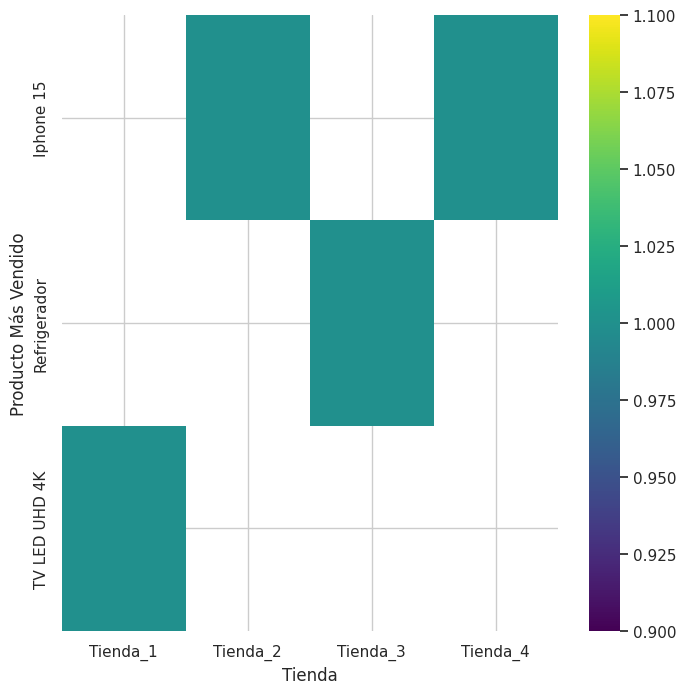

In [21]:
# title Tienda vs Producto Más Vendido

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Producto Más Vendido'].value_counts()
    for x_label, grp in comparativo.groupby('Tienda')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Tienda')
_ = plt.ylabel('Producto Más Vendido')

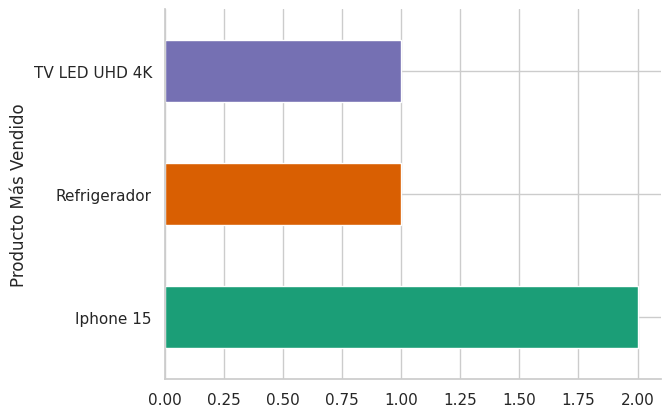

In [19]:
# @title Producto Más Vendido

from matplotlib import pyplot as plt
import seaborn as sns
comparativo.groupby('Producto Más Vendido').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1064838966.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Ventas Totales", data=comparativo, palette=corporate_palette)


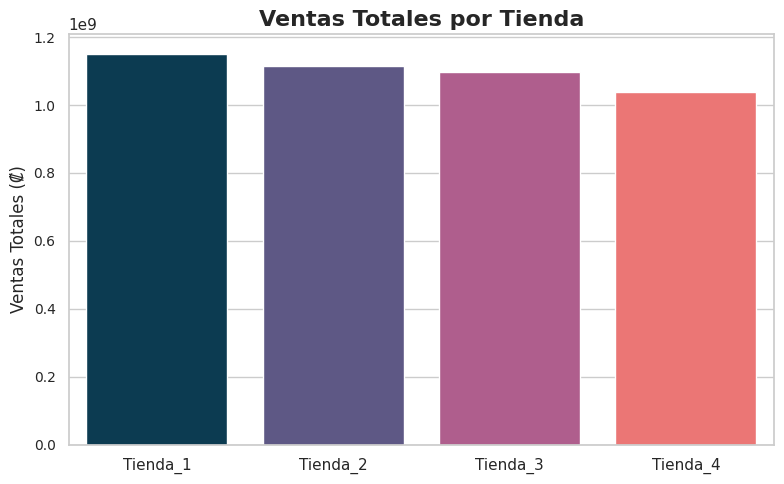

/tmp/ipython-input-1064838966.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Costo Envío Total", data=comparativo, palette=corporate_palette)


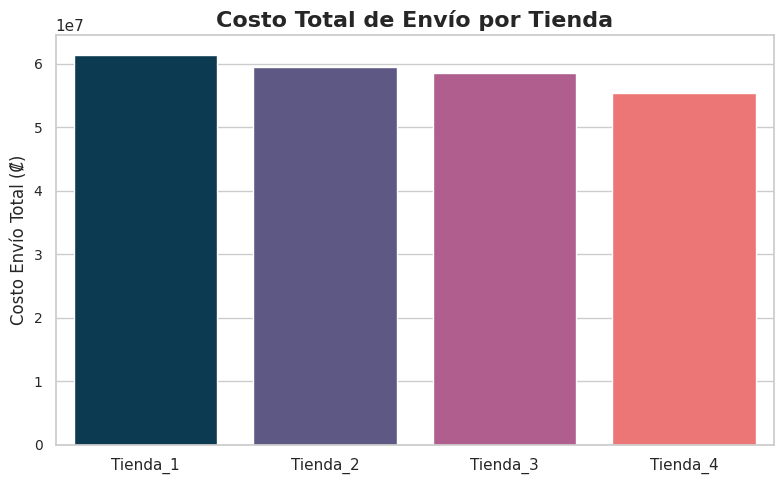

/tmp/ipython-input-1064838966.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Calificación Promedio", data=comparativo, palette=corporate_palette)


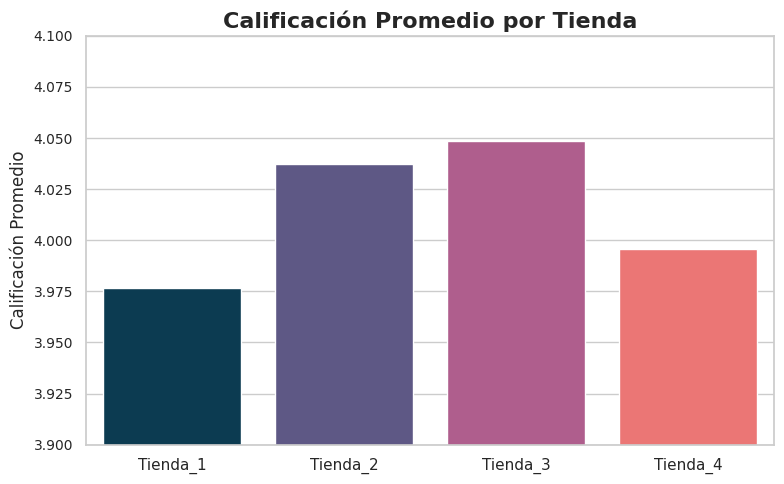

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo profesional
sns.set_theme(style="whitegrid", palette="muted")
corporate_palette = ["#003f5c", "#58508d", "#bc5090", "#ff6361"]

# --- 1. Ventas totales por tienda ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Ventas Totales", data=comparativo, palette=corporate_palette)
plt.title("Ventas Totales por Tienda", fontsize=16, weight='bold')
plt.ylabel("Ventas Totales (₡)", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 2. Costo de envío por tienda ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Costo Envío Total", data=comparativo, palette=corporate_palette)
plt.title("Costo Total de Envío por Tienda", fontsize=16, weight='bold')
plt.ylabel("Costo Envío Total (₡)", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 3. Calificación promedio ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Calificación Promedio", data=comparativo, palette=corporate_palette)
plt.title("Calificación Promedio por Tienda", fontsize=16, weight='bold')
plt.ylabel("Calificación Promedio", fontsize=12)
plt.ylim(3.9, 4.1)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

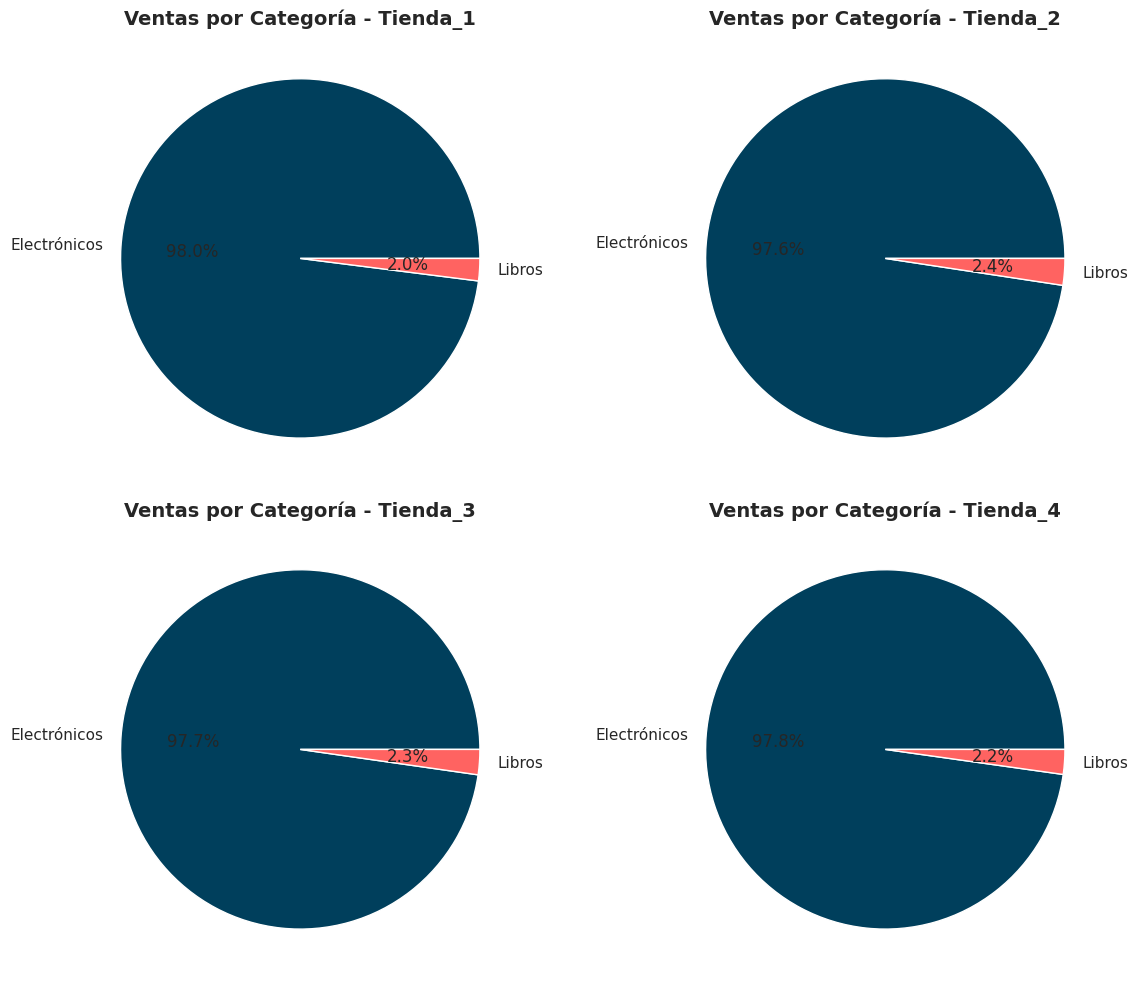

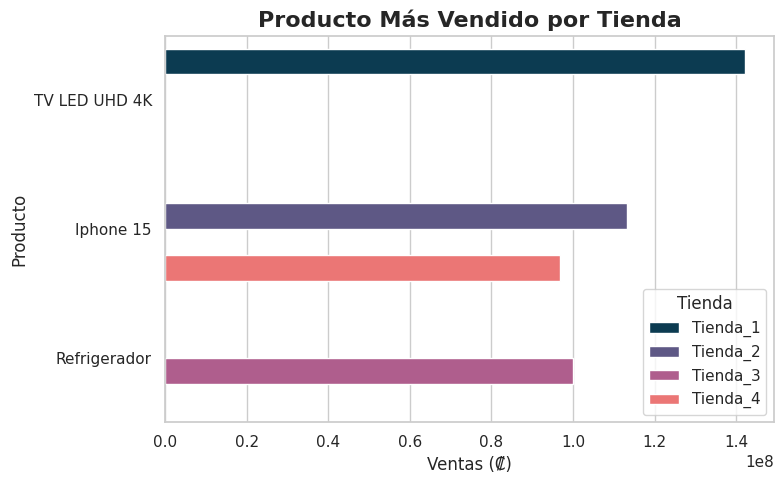

In [25]:
# --- 4. Ventas por categoría (gráfico de pastel para cada tienda)
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

for i, (index, row) in enumerate(comparativo.iterrows()):
    tienda = row["Tienda"]
    # Dato para gráficos de pastel
    data = {
        row["Categoria Más Vendida"]: row["Ventas Categoria Máx"],
        row["Categoria Menos Vendida"]: row["Ventas Categoria Mín"]
    }

    ax = axes[i]
    ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', colors=[corporate_palette[0], corporate_palette[3]])
    ax.set_title(f"Ventas por Categoría - {tienda}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# --- 5. Ranking de productos más vendidos ---
plt.figure(figsize=(8,5))
sns.barplot(x="Ventas Producto Máx", y="Producto Más Vendido", hue="Tienda", data=comparativo, palette=corporate_palette)
plt.title("Producto Más Vendido por Tienda", fontsize=16, weight='bold')
plt.xlabel("Ventas (₡)", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones finales

1️⃣ Resumen de resultados clave
Tienda	Ventas Totales	Calificación Promedio	Costo Envío Total	Categoría más vendida	Producto más vendido
Tienda 1	₡1,150,880,000	3.98 ⭐	₡61,377,900	Electrónicos	TV LED UHD 4K
Tienda 2	₡1,116,344,000	4.04 ⭐	₡59,485,100	Electrónicos	iPhone 15
Tienda 3	₡1,098,020,000	4.05 ⭐	₡58,516,600	Electrónicos	Refrigerador
Tienda 4	₡1,038,376,000	4.00 ⭐	₡55,317,400	Electrónicos	iPhone 15

2️⃣ Análisis comparativo
Ventas Totales → Tienda 1 lidera en ingresos, Tienda 4 es la más baja.

Costos de Envío → Tienda 4 es la más eficiente en logística, Tienda 1 gasta más.

Calificación Promedio → Tienda 3 es la mejor valorada por los clientes.

Categorías → Todas dependen fuertemente de Electrónicos, con Libros como el punto débil.

Productos Estrella → Cada tienda tiene un producto fuerte, pero los de Tienda 1 y Tienda 2 tienen precios más altos, lo que impulsa sus ingresos.

3️⃣ Recomendación
Si tu amigo quiere vender la tienda con menor potencial futuro considerando ventas, reputación y diversificación, la candidata más clara es:

🛑 Tienda 4
Menor volumen de ventas.

Reputación promedio estable pero no la más alta.

Dependencia casi total de un solo producto (iPhone 15).

Aunque tiene costos de envío bajos, esto no compensa la menor facturación.

📊 Si el objetivo fuera vender la tienda más atractiva para compradores (alto ingreso, buena marca), Tienda 1 sería la opción más valiosa.
Pero si la meta es deshacerse de la menos rentable para liberar recursos, Tienda 4 es la elección lógica.